# Voorspellend onderhoud binnen de utiliteitsbouw

*Het programma dat u voor u ziet, is het resultaat van de tweede fase in het afstudeerproject naar voorspellend onderhoud voor filters in luchtbehandelingskasten. Voor informatie over de gebruikte functies of de verschillende ontwerpkeuzes die gemaakt zijn, wordt doorverwezen naar document 'Verslag machine learning'. Deze wordt als bijlage bij het eindverslag van de student geleverd; 'Voorspellend onderhoud binnen de utiliteitsbouw'.*

**Een virtuele omgeving ontworpen door Glenn Huitink.**

**December 2021, Groenlo.**

**BINX Smartility.**

# Opzet

Allereerst zullen een aantal bibliotheken geïmporteerd moeten worden om het gebruik van externe functies mogelijk te maken:
- SciKit-Learn (`sklearn`)
- Matplotlib (`matplotlib`)
- pandas (`pandas`)

De relevantie van elke bibliotheek afzonderlijk, wordt uitgebreid beschreven in het verslag.

In [1]:
# Python ≥3.5 is nodig (loopt op dit moment op 3.9.9)
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is nodig
import sklearn
assert sklearn.__version__ >= "0.20"

# Algemene bibliotheken 
import numpy as np
import os

# Bibliotheken om grafieken te plotten via Matplot
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "PdM_Filters_Project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Importeren van data

De data wordt geïmporteerd vanuit een Microsoft Excel document. Deze is gegenereerd vanuit SkySpark; het platform waar BINX data vanuit het gebouwbeheersysteem opslaat. De dataverzameling begon op woensdag 10 november 2021 om 13:00 tot en met vrijdag 26 november om 10:00. 

In [2]:
# Importeer de data als 'dataset_filter'
import  os 
import  tarfile 
import  urllib
import pandas as pd
dataset_filter = pd.read_csv(r'C:\Users\ZBook\OneDrive - Binx Smartility B.V\DataMining\Dataset_PdM_Filters_1_2.csv')


In [3]:
dataset_filter.head()

,Timestamp,SCE Weather Station Weather station particulate PM2.5,SCE Weather Station Weater station particulate PM10,SCE StageFilters Airflow TV meting 2-1,SCE StageFilters Airflow TV meting 1-3,SCE StageFilters Airflow TV meting 0-1,SCE StageFilters Airflow TV meting 0-3,SCE StageFilters Fan,SCE StageFilters Airflow TV meting 1-1,SCE StageFilters Airflow TV meting 3-1,SCE StageFilters Airflow TV meting 2-2,SCE StageFilters Filter,SCE StageFilters Airflow TV meting 0-2,SCE StageFilters Airflow TV meting 3-2,SCE StageFilters Airflow TV meting 1-2,SCE StageFilters Airflow TV meting 2-3
0,2021-11-10T13:00:00+01:00 Amsterdam,10.038417,17.142726,2381.875m³/h,1292.3m³/h,1613.76m³/h,968.3478260869565m³/h,59.04%,1154.2857142857142m³/h,1335.4406779661017m³/h,623.375m³/h,39.48148148148148Pa,377.30434782608694m³/h,628.7096774193549m³/h,739m³/h,2850m³/h
1,2021-11-10T14:00:00+01:00 Amsterdam,9.512948,16.357076,2467.05m³/h,1273.7666666666667m³/h,1618.6440677966102m³/h,483.6140350877193m³/h,56.44%,981.1525423728814m³/h,1259.6m³/h,625.2372881355932m³/h,37.702127659574465Pa,375.7241379310345m³/h,561.6271186440678m³/h,649.3389830508474m³/h,2807.55m³/h
2,2021-11-10T15:00:00+01:00 Amsterdam,9.257286,15.869389,1184.6333333333334m³/h,1257.4833333333333m³/h,1589.9833333333333m³/h,34.58181818181818m³/h,46.31%,996.2166666666667m³/h,1198.8m³/h,516.8833333333333m³/h,25.916666666666668Pa,373.5344827586207m³/h,365.46666666666664m³/h,657.1833333333333m³/h,462.7719298245614m³/h
3,2021-11-10T16:00:00+01:00 Amsterdam,8.921606,15.484973,940.4m³/h,1225.5833333333333m³/h,1580.322033898305m³/h,33.982142857142854m³/h,43.26%,320.10526315789474m³/h,1207.05m³/h,505.1525423728813m³/h,20.41176470588235Pa,372.2542372881356m³/h,367.271186440678m³/h,500.8474576271187m³/h,37.672413793103445m³/h
4,2021-11-10T17:00:00+01:00 Amsterdam,9.507996,16.853290,985.85m³/h,1215.4745762711864m³/h,1570.4655172413793m³/h,33.85964912280702m³/h,42.75%,45.68421052631579m³/h,1019.2586206896551m³/h,502.6842105263158m³/h,18.464285714285715Pa,369.9642857142857m³/h,364.8135593220339m³/h,329.57894736842104m³/h,37.42m³/h


**Data opschonen**

Vanuit Excel wordt de data niet in het juiste format (voor Machine Learning) aangeleverd. Eerst moet de data gemanipuleerd worden, voordat de ontwerper kan beginnen met het verkrijgen van inzichten.

In [4]:
# Benaming van kolom veranderen naar logische namen
dataset_filter = dataset_filter.rename(columns={'SCE StageFilters Fan': 'Aansturing Ventilator', 
                                                'SCE StageFilters Filter': 'Drukverschil Filter',
                                                'SCE Weather Station Weather station particulate PM2.5': 'Fijnstofconcentratie PM2.5',
                                                'SCE Weather Station Weater station particulate PM10': 'Fijnstofconcentratie PM10'
                                               })

In [5]:
# Type controleren van 'Timestamp'
dataset_filter.Timestamp.head()

0    2021-11-10T13:00:00+01:00 Amsterdam
1    2021-11-10T14:00:00+01:00 Amsterdam
2    2021-11-10T15:00:00+01:00 Amsterdam
3    2021-11-10T16:00:00+01:00 Amsterdam
4    2021-11-10T17:00:00+01:00 Amsterdam
Name: Timestamp, dtype: object

In [6]:
# 'Amsterdam' verwijderen om type te kunnen formatteren
dataset_filter['Timestamp'] = dataset_filter['Timestamp'].str.replace(" Amsterdam","")
dataset_filter.Timestamp.head()

0    2021-11-10T13:00:00+01:00
1    2021-11-10T14:00:00+01:00
2    2021-11-10T15:00:00+01:00
3    2021-11-10T16:00:00+01:00
4    2021-11-10T17:00:00+01:00
Name: Timestamp, dtype: object

In [7]:
# Functie om een datum met een bepaald type te veranderen naar 'datetime64'-type
def verander_format_datum(datum, format_datetime):
    return pd.to_datetime(datum, format = format_datetime, errors = 'coerce')

Het 'datetime64'-type maakt gebruik van karakters om het format te bepalen. Deze hebben ieder een eigen betekenis. In de tabel hieronder staan de karakters weergeven met de bijbehorende betekenis

| Karakter | Betekenis |
| --- | --- | --- |
| '%a' | Afkorting van weekdag |
| '%A' | Weekdag |
| '%w' | Weekdag als getal |
| '%d' | Dag van de maand als decimaal getal met nullen |
| '%b' | Afkorting van maand |
| '%B' | Maand |
| '%m' | Maand als decimaal getal met nullen |
| '%y' | Jaar zonder eeuw |
| '%Y' | Jaar met eeuw |
| '%H' | Uur per 24 |
| '%I' | Uur per 12 |
| '%p' | AM of PM |
| '%M' | Minuten |
| '%S' | Seconden |
| '%f' | Microseconden (6 decimalen) |
| '%z' | Tijdzone afwijking |
| '%Z' | Benaming tijdzone |
| '%j' | Dag van het jaar als decimaal getal |
| '%U' | Weeknummer van het jaar (zondag eerst) |
| '%W' | Weeknummer van het jaar (maandag eerst) |
| '%c' | Lokale tijd- en datumweergave (Tue Aug 16 21:30:00 1988 (en_US)) |
| '%x' | Lokale datumweergave (08/16/1988 (en_US)) |
| '%X' | Lokale tijdweergave (21:30:00 (en_US)) |
| '%%' | Een '%' karakter |

In [8]:
# Format bepalen
format_datetime = '%Y-%m-%dT%H:%M:%S%z'
dataset_filter['Timestamp'] = verander_format_datum(dataset_filter['Timestamp'], format_datetime)
dataset_filter.Timestamp.head()

0   2021-11-10 13:00:00+01:00
1   2021-11-10 14:00:00+01:00
2   2021-11-10 15:00:00+01:00
3   2021-11-10 16:00:00+01:00
4   2021-11-10 17:00:00+01:00
Name: Timestamp, dtype: datetime64[ns, pytz.FixedOffset(60)]

In [9]:
# Missende waardes aanvullen met voorgaande waardes
dataset_filter.ffill(inplace=True)
dataset_filter.head()

,Timestamp,Fijnstofconcentratie PM2.5,Fijnstofconcentratie PM10,SCE StageFilters Airflow TV meting 2-1,SCE StageFilters Airflow TV meting 1-3,SCE StageFilters Airflow TV meting 0-1,SCE StageFilters Airflow TV meting 0-3,Aansturing Ventilator,SCE StageFilters Airflow TV meting 1-1,SCE StageFilters Airflow TV meting 3-1,SCE StageFilters Airflow TV meting 2-2,Drukverschil Filter,SCE StageFilters Airflow TV meting 0-2,SCE StageFilters Airflow TV meting 3-2,SCE StageFilters Airflow TV meting 1-2,SCE StageFilters Airflow TV meting 2-3
0,2021-11-10 13:00:00+01:00,10.038417,17.142726,2381.875m³/h,1292.3m³/h,1613.76m³/h,968.3478260869565m³/h,59.04%,1154.2857142857142m³/h,1335.4406779661017m³/h,623.375m³/h,39.48148148148148Pa,377.30434782608694m³/h,628.7096774193549m³/h,739m³/h,2850m³/h
1,2021-11-10 14:00:00+01:00,9.512948,16.357076,2467.05m³/h,1273.7666666666667m³/h,1618.6440677966102m³/h,483.6140350877193m³/h,56.44%,981.1525423728814m³/h,1259.6m³/h,625.2372881355932m³/h,37.702127659574465Pa,375.7241379310345m³/h,561.6271186440678m³/h,649.3389830508474m³/h,2807.55m³/h
2,2021-11-10 15:00:00+01:00,9.257286,15.869389,1184.6333333333334m³/h,1257.4833333333333m³/h,1589.9833333333333m³/h,34.58181818181818m³/h,46.31%,996.2166666666667m³/h,1198.8m³/h,516.8833333333333m³/h,25.916666666666668Pa,373.5344827586207m³/h,365.46666666666664m³/h,657.1833333333333m³/h,462.7719298245614m³/h
3,2021-11-10 16:00:00+01:00,8.921606,15.484973,940.4m³/h,1225.5833333333333m³/h,1580.322033898305m³/h,33.982142857142854m³/h,43.26%,320.10526315789474m³/h,1207.05m³/h,505.1525423728813m³/h,20.41176470588235Pa,372.2542372881356m³/h,367.271186440678m³/h,500.8474576271187m³/h,37.672413793103445m³/h
4,2021-11-10 17:00:00+01:00,9.507996,16.853290,985.85m³/h,1215.4745762711864m³/h,1570.4655172413793m³/h,33.85964912280702m³/h,42.75%,45.68421052631579m³/h,1019.2586206896551m³/h,502.6842105263158m³/h,18.464285714285715Pa,369.9642857142857m³/h,364.8135593220339m³/h,329.57894736842104m³/h,37.42m³/h


In [10]:
# Verwijderen van karakters die geen nummers zijn (Pa, %, etc.)
import re
kolom_timestamp = dataset_filter.pop('Timestamp')
dataset_filter = dataset_filter.astype(str)
dataset_filter = dataset_filter.applymap(lambda x: re.sub(r'[^0-9^\-\.]+', '', x)).replace('', np.float64(0)).astype('float64') 
dataset_filter.insert(0, 'Timestamp', kolom_timestamp)
dataset_filter.head()

,Timestamp,Fijnstofconcentratie PM2.5,Fijnstofconcentratie PM10,SCE StageFilters Airflow TV meting 2-1,SCE StageFilters Airflow TV meting 1-3,SCE StageFilters Airflow TV meting 0-1,SCE StageFilters Airflow TV meting 0-3,Aansturing Ventilator,SCE StageFilters Airflow TV meting 1-1,SCE StageFilters Airflow TV meting 3-1,SCE StageFilters Airflow TV meting 2-2,Drukverschil Filter,SCE StageFilters Airflow TV meting 0-2,SCE StageFilters Airflow TV meting 3-2,SCE StageFilters Airflow TV meting 1-2,SCE StageFilters Airflow TV meting 2-3
0,2021-11-10 13:00:00+01:00,10.038417,17.142726,2381.875000,1292.300000,1613.760000,968.347826,59.04,1154.285714,1335.440678,623.375000,39.481481,377.304348,628.709677,739.000000,2850.000000
1,2021-11-10 14:00:00+01:00,9.512948,16.357076,2467.050000,1273.766667,1618.644068,483.614035,56.44,981.152542,1259.600000,625.237288,37.702128,375.724138,561.627119,649.338983,2807.550000
2,2021-11-10 15:00:00+01:00,9.257286,15.869389,1184.633333,1257.483333,1589.983333,34.581818,46.31,996.216667,1198.800000,516.883333,25.916667,373.534483,365.466667,657.183333,462.771930
3,2021-11-10 16:00:00+01:00,8.921606,15.484973,940.400000,1225.583333,1580.322034,33.982143,43.26,320.105263,1207.050000,505.152542,20.411765,372.254237,367.271186,500.847458,37.672414
4,2021-11-10 17:00:00+01:00,9.507996,16.853290,985.850000,1215.474576,1570.465517,33.859649,42.75,45.684211,1019.258621,502.684211,18.464286,369.964286,364.813559,329.578947,37.420000


In [11]:
# Totale flow berekenen van sensoren die flow meten
kenmerken_lijst = list(dataset_filter) 
niet_flow_kenmerken = ['Timestamp', 'Aansturing Ventilator', 'Drukverschil Filter', 'Fijnstofconcentratie PM2.5', 'Fijnstofconcentratie PM10']
flow_kenmerken = [ele for ele in kenmerken_lijst if ele not in niet_flow_kenmerken]
dataset_filter["Totale Flow"] = dataset_filter[flow_kenmerken].sum(axis=1)
dataset_filter.drop(flow_kenmerken, axis = 1, inplace=True)
dataset_filter.head()

,Timestamp,Fijnstofconcentratie PM2.5,Fijnstofconcentratie PM10,Aansturing Ventilator,Drukverschil Filter,Totale Flow
0,2021-11-10 13:00:00+01:00,10.038417,17.142726,59.04,39.481481,13964.398244
1,2021-11-10 14:00:00+01:00,9.512948,16.357076,56.44,37.702128,13103.304840
2,2021-11-10 15:00:00+01:00,9.257286,15.869389,46.31,25.916667,8637.538231
3,2021-11-10 16:00:00+01:00,8.921606,15.484973,43.26,20.411765,7090.640611
4,2021-11-10 17:00:00+01:00,9.507996,16.853290,42.75,18.464286,6475.053577


In [12]:
# Voltooide levensduur bepalen van een filter
from datetime import datetime
format_datetime = '%Y-%m-%dT%H:%M:%S'
plaatsing_filter = verander_format_datum('2021-06-23T12:00:00+01:00', format_datetime)
huidige_levensduur = verander_format_datum(dataset_filter['Timestamp'], format_datetime)
dataset_filter["Voltooide Levensduur"] = huidige_levensduur - plaatsing_filter
dataset_filter["Voltooide Levensduur"].head()

0   140 days 01:00:00
1   140 days 02:00:00
2   140 days 03:00:00
3   140 days 04:00:00
4   140 days 05:00:00
Name: Voltooide Levensduur, dtype: timedelta64[ns]

In [13]:
# Functie om het aantal uren van een waarde met het type 'timedelta64' te bereken
def deltatijd_uren(datum):
    dagen = datum.dt.days
    seconden = datum.dt.seconds
    uren_totaal = (dagen*24) + (seconden/3600)
    return uren_totaal

In [14]:
# Aantal voltooide uren berekenen van het filter
dataset_filter['Voltooide Levensduur'] = deltatijd_uren(dataset_filter["Voltooide Levensduur"])
dataset_filter.head()

,Timestamp,Fijnstofconcentratie PM2.5,Fijnstofconcentratie PM10,Aansturing Ventilator,Drukverschil Filter,Totale Flow,Voltooide Levensduur
0,2021-11-10 13:00:00+01:00,10.038417,17.142726,59.04,39.481481,13964.398244,3361.0
1,2021-11-10 14:00:00+01:00,9.512948,16.357076,56.44,37.702128,13103.304840,3362.0
2,2021-11-10 15:00:00+01:00,9.257286,15.869389,46.31,25.916667,8637.538231,3363.0
3,2021-11-10 16:00:00+01:00,8.921606,15.484973,43.26,20.411765,7090.640611,3364.0
4,2021-11-10 17:00:00+01:00,9.507996,16.853290,42.75,18.464286,6475.053577,3365.0


**Toevoegen van waardes**

In het verslag wordt aangegeven dat het filteroppervlak belangrijk is voor het stof dat een filter op kan nemen. Een groter oppervlak resulteert daarom in een langere levensduur.
Ook de klasse heeft invloed op de levensduur van een filter. Dit kenmerk wordt ook meegenomen in de dataset.
Uiteindelijk zal dit weinig invloed hebben op de uitkomst, omdat er maar één soort filter gemeten wordt. Het kan echter wel nuttig zijn als er later meerdere verschillende soorten filters gemeten gaan worden. Hierdoor zal de uitkomst aangepast worden op het oppervlak van de filter, als het model getraind is.

In [15]:
dataset_filter['Filteroppervlak'] = 59.78144
dataset_filter['Klasse'] = 'F7'

In [16]:
# Rangschik kolommen in alfabetische volgorde
dataset_filter = dataset_filter.reindex(sorted(dataset_filter.columns), axis=1)
eerste_kolom = dataset_filter.pop('Timestamp')
dataset_filter.insert(0, 'Timestamp', eerste_kolom)
dataset_filter.head()

,Timestamp,Aansturing Ventilator,Drukverschil Filter,Fijnstofconcentratie PM10,Fijnstofconcentratie PM2.5,Filteroppervlak,Klasse,Totale Flow,Voltooide Levensduur
0,2021-11-10 13:00:00+01:00,59.04,39.481481,17.142726,10.038417,59.78144,F7,13964.398244,3361.0
1,2021-11-10 14:00:00+01:00,56.44,37.702128,16.357076,9.512948,59.78144,F7,13103.304840,3362.0
2,2021-11-10 15:00:00+01:00,46.31,25.916667,15.869389,9.257286,59.78144,F7,8637.538231,3363.0
3,2021-11-10 16:00:00+01:00,43.26,20.411765,15.484973,8.921606,59.78144,F7,7090.640611,3364.0
4,2021-11-10 17:00:00+01:00,42.75,18.464286,16.853290,9.507996,59.78144,F7,6475.053577,3365.0


# 2 Data-inzicht

Het verkrijgen van inzichten in de geïmporteerde data is de tweede stap van het CRISP-DM model. Het doel van deze stap is het maken en bevestigen van aannames die de ontwerper gesteld heeft. Het zal bestaan uit het creëren van specificaties over en visualiseren van de data. 

In [17]:
dataset_filter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype                               
---  ------                      --------------  -----                               
 0   Timestamp                   698 non-null    datetime64[ns, pytz.FixedOffset(60)]
 1   Aansturing Ventilator       698 non-null    float64                             
 2   Drukverschil Filter         698 non-null    float64                             
 3   Fijnstofconcentratie PM10   698 non-null    float64                             
 4   Fijnstofconcentratie PM2.5  698 non-null    float64                             
 5   Filteroppervlak             698 non-null    float64                             
 6   Klasse                      698 non-null    object                              
 7   Totale Flow                 698 non-null    float64                             
 8   Voltooide Levensduur        698

In [18]:
dataset_filter.describe()

,Aansturing Ventilator,Drukverschil Filter,Fijnstofconcentratie PM10,Fijnstofconcentratie PM2.5,Filteroppervlak,Totale Flow,Voltooide Levensduur
count,698.000000,698.000000,698.000000,698.000000,6.980000e+02,698.000000,698.00000
mean,35.290989,21.046326,19.014672,11.156242,5.978144e+01,7384.886909,3709.50000
std,29.415669,20.709369,9.617828,7.575856,2.133157e-14,7318.456493,201.63953
min,0.000000,1.000000,4.310345,2.271875,5.978144e+01,362.407862,3361.00000
25%,0.000000,1.500000,12.189023,5.437288,5.978144e+01,366.952534,3535.25000
50%,47.500000,21.864937,18.035045,9.681992,5.978144e+01,7404.088242,3709.50000
75%,52.435000,29.452391,24.968425,14.042083,5.978144e+01,11122.652094,3883.75000
max,89.570000,81.491525,45.344828,35.380000,5.978144e+01,24976.102971,4058.00000


In [19]:
dataset_filter.memory_usage()

Index                          128
Timestamp                     5584
Aansturing Ventilator         5584
Drukverschil Filter           5584
Fijnstofconcentratie PM10     5584
Fijnstofconcentratie PM2.5    5584
Filteroppervlak               5584
Klasse                        5584
Totale Flow                   5584
Voltooide Levensduur          5584
dtype: int64

In [20]:
dataset_filter["Klasse"].value_counts()

F7    698
Name: Klasse, dtype: int64

Saving figure datapunten_histogrammen


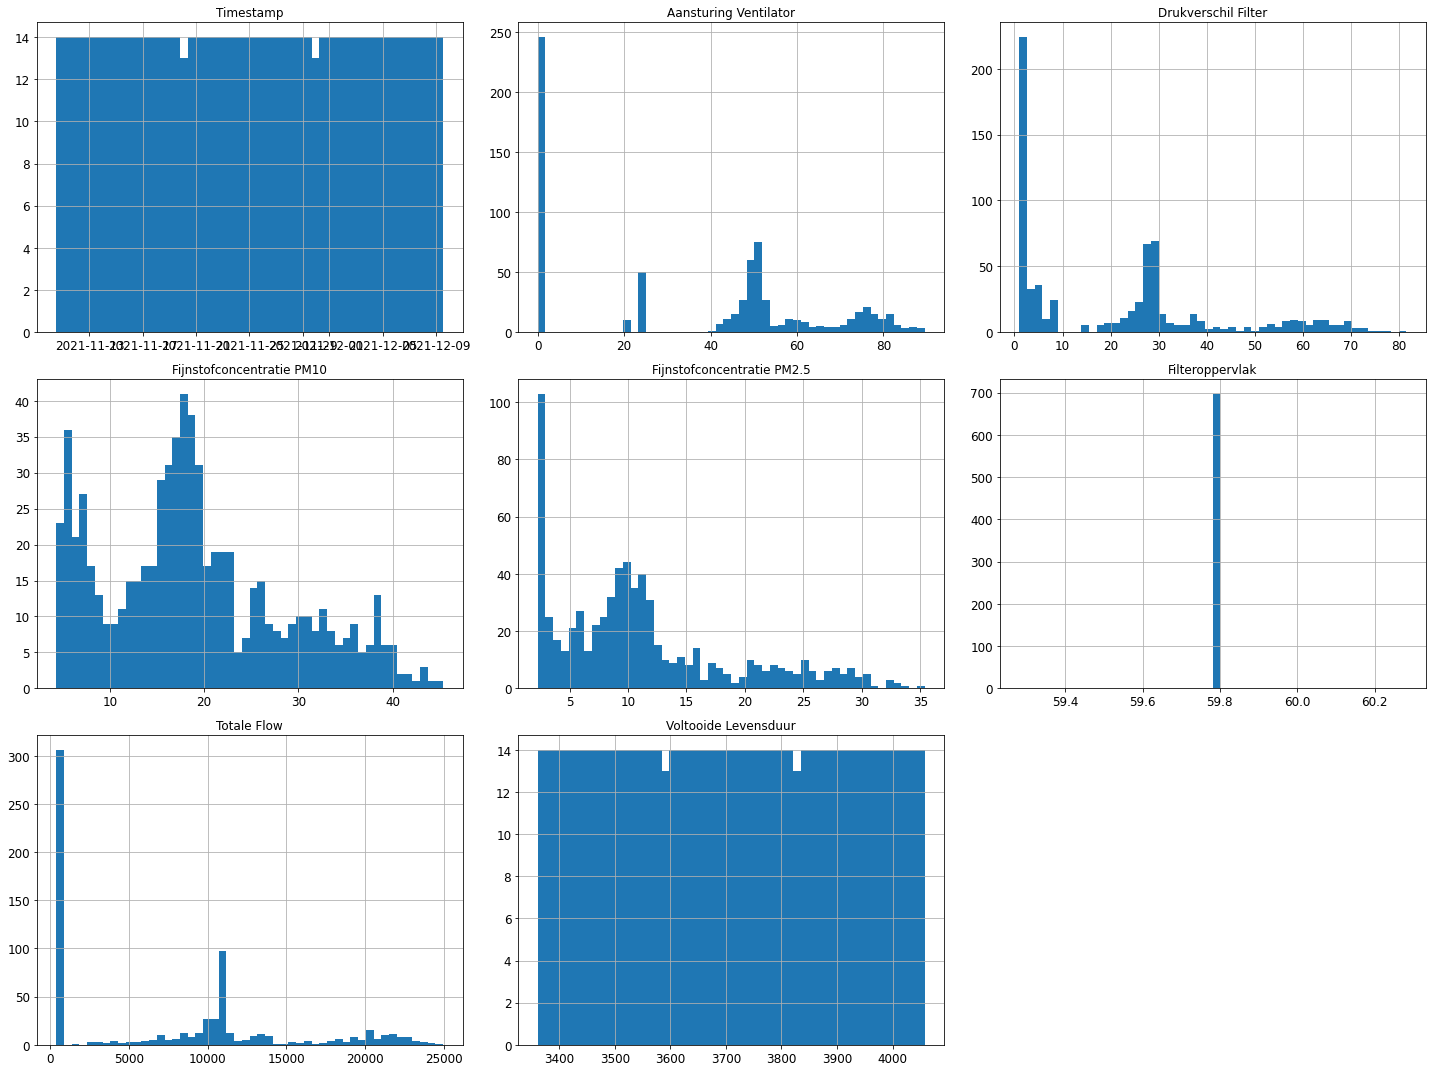

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
dataset_filter.hist(bins=50, figsize=(20,15))
save_fig("datapunten_histogrammen")
plt.show()

# 3 Data voorbereiden

Het voorbereiden van de dataset is misschien wel de meest belangrijke stap in een Machine Learning project. Als deze stap goed uitgevoerd wordt, kost het erg veel tijd.
De output van deze stap bestaat uit een voorbereide dataset, deze zal gebruikt worden voor de fase waarin het model getraind wordt.

**3.1 Data selecteren**

Het selecteren van data begint voordat er begonnen word met het ontwerpen van een Machine Learning model. Met behulp van experts wordt een selectie bepaald. Het is belangrijk dat deze selectie gevalideerd wordt. Hieronder worden functies geschreven om de relevantie van kenmerken, tot de gewenste voorspelling, bloot te leggen. Het is mogelijk dat er kenmerken verwijderd worden na deze analyse.

Verder is het essentieel om de datasets te verdelen in verschillende subsets; een test en train set. De testset zal gebruikt worden om de validiteit van het model te testen. Dit model is op zijn beurt getraind met de trainset.

 

In [22]:
# Correlatie van kenmerken ten opzichte van het label (= kenmerk wat uiteindelijk voorspeld zal worden)
dataset_filter_corr = dataset_filter.corr()
dataset_filter_corr["Drukverschil Filter"].sort_values(ascending=False)

Drukverschil Filter           1.000000
Totale Flow                   0.984587
Aansturing Ventilator         0.837866
Voltooide Levensduur          0.118718
Fijnstofconcentratie PM2.5   -0.066346
Fijnstofconcentratie PM10    -0.114128
Filteroppervlak                    NaN
Name: Drukverschil Filter, dtype: float64

Saving figure scatter_matrix


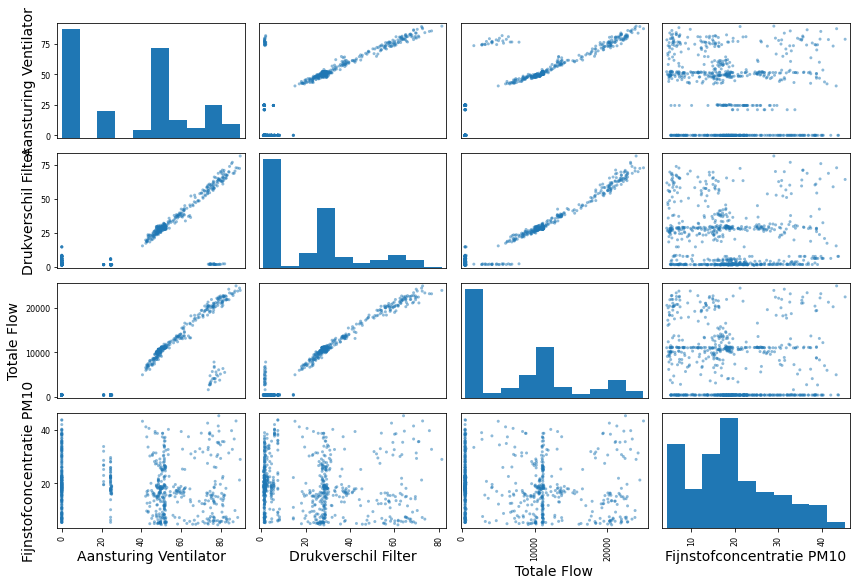

In [23]:
# Scatter matrices plotten om correlatie tussen waardes te herleiden
from pandas.plotting import scatter_matrix

kenmerken = ["Aansturing Ventilator", "Drukverschil Filter", "Totale Flow",
              "Fijnstofconcentratie PM10"]
scatter_matrix(dataset_filter[kenmerken], figsize=(12, 8))
save_fig("scatter_matrix")

Saving figure flow_uitgezet_tegen_drukverschil_scattermatrix


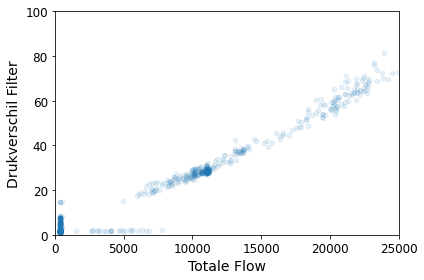

In [24]:
# Scatter matrix waar totale flow uitgezet is tegen het drukverschil
dataset_filter.plot(kind="scatter", x="Totale Flow", y="Drukverschil Filter",
             alpha=0.1)
plt.axis([0, 25000, 0, 100])
save_fig("flow_uitgezet_tegen_drukverschil_scattermatrix")

Saving figure aansturing_uitgezet_tegen_drukverschil_scattermatrix


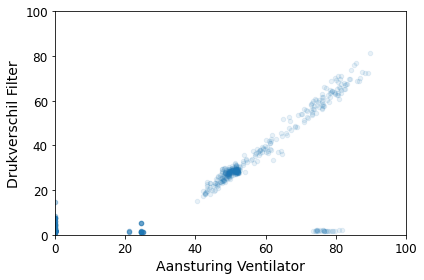

In [25]:
dataset_filter.plot(kind="scatter", x="Aansturing Ventilator", y="Drukverschil Filter",
             alpha=0.1)
plt.axis([0, 100, 0, 100])
save_fig("aansturing_uitgezet_tegen_drukverschil_scattermatrix")

In [26]:
# Deze functie zorgt er voor dat de output telkens hetzelfde is
np.random.seed(42)

In [27]:
from zlib import crc32

# Functies om er voor te zorgen dat de test_set telkens hetzelfde is
# Dit is niet het geval omdat er een randomizer zit in train_test_split
def test_set_check(identifier, test_ratio):
    return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

def split_train_test_by_index(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [28]:
# De dataset heeft, voor het checken van de test set, een index nodig
dataset_index = dataset_filter.reset_index()   # Voeg index kolom toe
train_set_filters, test_set_filters = split_train_test_by_index(dataset_index, 0.2, "index")

In [29]:
# Voor elke rij moet een uniek ID aangemaakt worden, zodat nieuwe data onderaan de dataset komt
# De datapunten "Voltooide levensduur" en "Drukverschil filter" zijn uniek
dataset_index["ID"] = dataset_filter["Voltooide Levensduur"] * 1000 + dataset_filter["Drukverschil Filter"]
train_set_filters, test_set_filters = split_train_test_by_index(dataset_index, 0.2, "ID")

In [30]:
from sklearn.model_selection import train_test_split
# Dataset splitsen in een training en test set
train_set_filters, test_set_filters = train_test_split(dataset_filter, test_size=0.2, random_state=42)
# Tellen van aantal datapunten in train set
len(train_set_filters)

558

In [31]:
# Tellen van aantal datapunten in test set
len(test_set_filters)

140

In [32]:
train_set_filters.head()

,Timestamp,Aansturing Ventilator,Drukverschil Filter,Fijnstofconcentratie PM10,Fijnstofconcentratie PM2.5,Filteroppervlak,Klasse,Totale Flow,Voltooide Levensduur
82,2021-11-13 23:00:00+01:00,0.00,1.500000,21.368184,12.330993,59.78144,F7,366.486280,3443.0
51,2021-11-12 16:00:00+01:00,46.25,22.960784,15.143567,8.752501,59.78144,F7,8504.258631,3412.0
220,2021-11-19 17:00:00+01:00,43.36,21.923077,9.068966,3.753448,59.78144,F7,6644.009582,3581.0
559,2021-12-03 20:00:00+01:00,0.00,1.333333,13.762712,6.142373,59.78144,F7,366.635877,3920.0
544,2021-12-03 05:00:00+01:00,51.19,27.638298,31.810345,21.425000,59.78144,F7,11016.680684,3905.0


In [33]:
test_set_filters.head()

,Timestamp,Aansturing Ventilator,Drukverschil Filter,Fijnstofconcentratie PM10,Fijnstofconcentratie PM2.5,Filteroppervlak,Klasse,Totale Flow,Voltooide Levensduur
158,2021-11-17 03:00:00+01:00,25.00,1.333333,15.987735,8.733049,59.78144,F7,367.678966,3519.0
499,2021-12-01 08:00:00+01:00,58.13,35.775862,4.659091,2.319355,59.78144,F7,12371.537288,3860.0
396,2021-11-27 01:00:00+01:00,24.50,1.333333,5.295455,2.459375,59.78144,F7,366.786896,3757.0
155,2021-11-17 00:00:00+01:00,25.00,1.333333,17.381660,9.017705,59.78144,F7,362.407862,3516.0
321,2021-11-23 22:00:00+01:00,0.00,6.000000,40.320755,30.331667,59.78144,F7,364.152626,3682.0


<AxesSubplot:>

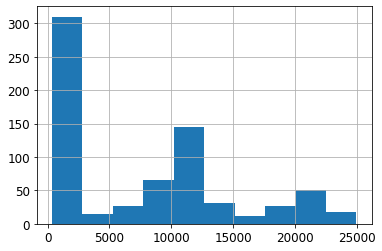

In [34]:
dataset_filter["Totale Flow"].hist()

De functies en grafieken wijzen uit dat 'Totale flow' de hoogste correlatie heeft tot de gewenste voorspelling. Zoals in het verslag staat beschreven, moeten de test- en trainset de werkelijke data vertegenwoordigen. Dit betekent dat de verhouding van de kenmerken in de train- en testset gelijk moeten zijn aan die in de dataset. Om dit te vergelijken, wordt 'Totale flow' verdeeld in 5 categoriën.

In [35]:
dataset_filter["Totale Flow Categorie"] = pd.cut(dataset_filter["Totale Flow"], 
                                                 bins=5, 
                                                 labels=False) + 1
dataset_filter

,Timestamp,Aansturing Ventilator,Drukverschil Filter,Fijnstofconcentratie PM10,Fijnstofconcentratie PM2.5,Filteroppervlak,Klasse,Totale Flow,Voltooide Levensduur,Totale Flow Categorie
0,2021-11-10 13:00:00+01:00,59.04,39.481481,17.142726,10.038417,59.78144,F7,13964.398244,3361.0,3
1,2021-11-10 14:00:00+01:00,56.44,37.702128,16.357076,9.512948,59.78144,F7,13103.304840,3362.0,3
2,2021-11-10 15:00:00+01:00,46.31,25.916667,15.869389,9.257286,59.78144,F7,8637.538231,3363.0,2
3,2021-11-10 16:00:00+01:00,43.26,20.411765,15.484973,8.921606,59.78144,F7,7090.640611,3364.0,2
4,2021-11-10 17:00:00+01:00,42.75,18.464286,16.853290,9.507996,59.78144,F7,6475.053577,3365.0,2
...,...,...,...,...,...,...,...,...,...,...
693,2021-12-09 10:00:00+01:00,80.26,62.724138,16.186441,7.328333,59.78144,F7,21597.519482,4054.0,5
694,2021-12-09 11:00:00+01:00,79.61,63.344828,19.593220,9.201667,59.78144,F7,22701.121005,4055.0,5
695,2021-12-09 12:00:00+01:00,89.23,72.350877,21.185185,10.330000,59.78144,F7,24472.674294,4056.0,5
696,2021-12-09 13:00:00+01:00,80.70,63.322034,21.862069,10.758333,59.78144,F7,21526.821469,4057.0,5


In [36]:
dataset_filter["Totale Flow Categorie"].value_counts()

1    324
3    176
2     92
5     68
4     38
Name: Totale Flow Categorie, dtype: int64

<AxesSubplot:>

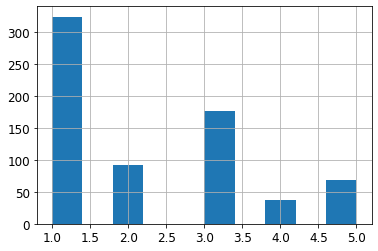

In [37]:
dataset_filter["Totale Flow Categorie"].hist()

Er wordt een 'StratifiedShuffleSplit' toegepast op de test- en trainset om representativiteit te verhogen.

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset_filter, dataset_filter["Totale Flow Categorie"]):
    strat_train_set = dataset_filter.loc[train_index]
    strat_test_set = dataset_filter.loc[test_index]

In [39]:
strat_test_set["Totale Flow Categorie"].value_counts() / len(strat_test_set)

1    0.464286
3    0.250000
2    0.128571
5    0.100000
4    0.057143
Name: Totale Flow Categorie, dtype: float64

In [40]:
dataset_filter["Totale Flow Categorie"].value_counts() / len(dataset_filter)

1    0.464183
3    0.252149
2    0.131805
5    0.097421
4    0.054441
Name: Totale Flow Categorie, dtype: float64

In [41]:
def totale_flow_proportions(data):
    return data["Totale Flow Categorie"].value_counts() / len(data)

train_set, test_set = train_test_split(dataset_filter, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": totale_flow_proportions(dataset_filter),
    "Stratified": totale_flow_proportions(strat_test_set),
    "Random": totale_flow_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [42]:
compare_props

,Overall,Stratified,Random,Rand. %error,Strat. %error
1,0.464183,0.464286,0.478571,3.099647,0.022046
2,0.131805,0.128571,0.114286,-13.291925,-2.453416
3,0.252149,0.250000,0.235714,-6.517857,-0.852273
4,0.054441,0.057143,0.050000,-8.157895,4.962406
5,0.097421,0.100000,0.121429,24.642857,2.647059


In [43]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("Totale Flow Categorie", axis=1, inplace=True)
    
dataset_filter.head()

,Timestamp,Aansturing Ventilator,Drukverschil Filter,Fijnstofconcentratie PM10,Fijnstofconcentratie PM2.5,Filteroppervlak,Klasse,Totale Flow,Voltooide Levensduur,Totale Flow Categorie
0,2021-11-10 13:00:00+01:00,59.04,39.481481,17.142726,10.038417,59.78144,F7,13964.398244,3361.0,3
1,2021-11-10 14:00:00+01:00,56.44,37.702128,16.357076,9.512948,59.78144,F7,13103.304840,3362.0,3
2,2021-11-10 15:00:00+01:00,46.31,25.916667,15.869389,9.257286,59.78144,F7,8637.538231,3363.0,2
3,2021-11-10 16:00:00+01:00,43.26,20.411765,15.484973,8.921606,59.78144,F7,7090.640611,3364.0,2
4,2021-11-10 17:00:00+01:00,42.75,18.464286,16.853290,9.507996,59.78144,F7,6475.053577,3365.0,2


**3.2 Data schoonmaken**

'Schoonmaken' bestaat uit het manipuleren van de waardes. In dit project is een groot gedeelte reeds in Excel opgelost. Niet alles is op te lossen in Excel, daarom wordt de rest hier in de virtuele omgeving verwerkt. 

Allereerst moeten de onvolledige rijen opgevuld worden met waardes. Dit kan op een aantal manieren: 
 - Verwijderen van de rij
 - Verwijderen van het complete kenmerk
 - Datapunt naar een bepaalde waarde zetten

Op dit moment is dit niet van belang bij dit project. In het begin is dit reeds al gedaan. De rijen missende waardes worden opgevuld door de voorgaande waarde te kopiëren.
Wel is het belangrijk dat dit voor het toevoegen van nieuwe waardes in de toekomst gebeurt, als er bijvoorbeeld een nieuw dataset wordt toegevoegd.

Ten tweede moeten alfabetische gegevens uitgedrukt worden in alfabetische numerieke waardes. Dit wordt ook wel encoden genoemd. In dit project is dit aanwezig in 'Klasse'. Op dit moment bestaan alle datapunten uit de waarde 'F7'. Het is belangrijk dat, wanneer er filters gemeten worden met een andere klasse, deze ook transformeren naar een nummer.

Het nummer zegt echter weinig over de daadwerkelijke waarde; de klasse. Daarom wordt one-hot encoding gebruikt. Dit betekent dat een bepaalde klasse hoog (1) zal zijn, waar de rest laag (0) is. Dit zorgt ervoor dat het Machine Learning model geen relatie zal koppelen aan de klasse; zoals dat wel zou gebeuren bij een opsomming van nominale waardes (1, 2, 3, etc.).

Het schalen van de waardes is hetgeen dat nog resteerd. Het is in deze belangrijk dat het aantal uitschieters bekend is, zodat gekozen kan worden voor de schalingsstrategie: normalisering of standaardisering.
Daarom worden er boxplots gegeneerd, hierin zijn de bolletjes uitschieters.


In [44]:
# Verwijder de labels in de training set
dataset_filter_without_label = train_set_filters.drop("Drukverschil Filter", axis=1) 
dataset_filter_label = train_set_filters["Drukverschil Filter"].copy()

In [45]:
dataset_filter_label.head()

82      1.500000
51     22.960784
220    21.923077
559     1.333333
544    27.638298
Name: Drukverschil Filter, dtype: float64

In [46]:
dataset_filter_without_label.head()

,Timestamp,Aansturing Ventilator,Fijnstofconcentratie PM10,Fijnstofconcentratie PM2.5,Filteroppervlak,Klasse,Totale Flow,Voltooide Levensduur
82,2021-11-13 23:00:00+01:00,0.00,21.368184,12.330993,59.78144,F7,366.486280,3443.0
51,2021-11-12 16:00:00+01:00,46.25,15.143567,8.752501,59.78144,F7,8504.258631,3412.0
220,2021-11-19 17:00:00+01:00,43.36,9.068966,3.753448,59.78144,F7,6644.009582,3581.0
559,2021-12-03 20:00:00+01:00,0.00,13.762712,6.142373,59.78144,F7,366.635877,3920.0
544,2021-12-03 05:00:00+01:00,51.19,31.810345,21.425000,59.78144,F7,11016.680684,3905.0


**3.2.1 Rijen opvullen**

De rijen worden opgevuld met het gemiddelde van het kenmerk waar missende waardes zitten. Deze kwamen in het Excel werkblad voor bij 'Aansturing Ventilator' en 'Drukverschil Filter'.

In [47]:
# Verwijderen van de labels in de train set
dataset_filter = strat_train_set.drop("Drukverschil Filter", axis=1)
dataset_filter_labels = strat_train_set["Drukverschil Filter"].copy()

In [48]:
dataset_filter.head()

,Timestamp,Aansturing Ventilator,Fijnstofconcentratie PM10,Fijnstofconcentratie PM2.5,Filteroppervlak,Klasse,Totale Flow,Voltooide Levensduur
234,2021-11-20 07:00:00+01:00,0.00,31.087719,20.511667,59.78144,F7,369.204277,3595.0
100,2021-11-14 17:00:00+01:00,49.50,17.280036,9.828600,59.78144,F7,10603.041320,3461.0
557,2021-12-03 18:00:00+01:00,0.00,13.655172,6.120339,59.78144,F7,446.218474,3918.0
132,2021-11-16 01:00:00+01:00,0.00,17.861994,10.096870,59.78144,F7,366.973860,3493.0
383,2021-11-26 12:00:00+01:00,76.39,13.224138,5.825424,59.78144,F7,21013.282786,3744.0


In [49]:
# Creëer een dataset met waardes bestaande uit alleen numerieke datatypes (int, float, etc.)
dataset_filter_num = dataset_filter.drop(["Klasse", "Timestamp"], axis=1)

In [50]:
# Functie om rijen op te vullen waar waardes ontbreken
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean") # Blanco cellen opvullen met het gemiddelde

In [51]:
# Voer een check uit op aanwezigheid van onvolledige rijen
onvolledige_rijen = dataset_filter[dataset_filter.isnull().any(axis=1)].head()
onvolledige_rijen

,Timestamp,Aansturing Ventilator,Fijnstofconcentratie PM10,Fijnstofconcentratie PM2.5,Filteroppervlak,Klasse,Totale Flow,Voltooide Levensduur


Onderstaande cellen voeren een controle uit. Hierbij wordt vergeleken of het aavullen van de cellen handmatig, dezelfde waardes geeft als automatisch. Daarnaast wordt gecheckt welke `Imputer` wordt gebruikt. Hierbij is keuze uit:
- `SimpleImputer`: vervangt een missende waarde met 'gemiddelde', 'mediaan', 'meest frequente', of 'constante'. Deze waardes worden berekent middels het kenmerk waar de missende waarde is. Correlaties tussen kenmerken worden niet meegenomen (`Univariate feature imputation`)

Onderstaande `Imputers` zijn gebaseerd op `Multivariate feature imputation`. Hierbij worden correlaties tussen kenmerken meegenomen. 
- `IterativeImputer`: Op de kolommen, waar geen missende waarde is, zal een regressiemodel uitgeoefend worden. Op de waardes in de rij waar de missende waarde zit, wordt voor alle missende waardes een voorspelling gemaakt (dit model is een op zich zelf staand model).
- `KNNImputer`: De rijen, waar geen missende waarde is, worden beoordeeld op de correlatie tot de rij waar wel een missende waarde is (de aantal rijen kan bewerkt worden door `n_neihgbours` aan te passen). Tussen deze rijen wordt het gemiddelde berekent van de waardes in dezelfde kolom als de missende waarde.

In [52]:
imputer.fit(dataset_filter_num)

SimpleImputer()

In [53]:
imputer.statistics_

array([  34.86915771,   19.17808604,   11.25329386,   59.78144   ,
       7327.04566654, 3707.20071685])

In [54]:
dataset_filter_num.mean().values

array([  34.86915771,   19.17808604,   11.25329386,   59.78144   ,
       7327.04566654, 3707.20071685])

In [55]:
X = imputer.transform(dataset_filter_num)

In [56]:
dataset_filter_tr = pd.DataFrame(X, columns=dataset_filter_num.columns,
                          index=dataset_filter.index)

In [57]:
dataset_filter_tr.loc[onvolledige_rijen.index.values]

,Aansturing Ventilator,Fijnstofconcentratie PM10,Fijnstofconcentratie PM2.5,Filteroppervlak,Totale Flow,Voltooide Levensduur


In [58]:
imputer.strategy

'mean'

In [59]:
dataset_filter_tr = pd.DataFrame(X, columns=dataset_filter_num.columns,
                          index=dataset_filter_num.index)

In [60]:
dataset_filter_tr.head()

,Aansturing Ventilator,Fijnstofconcentratie PM10,Fijnstofconcentratie PM2.5,Filteroppervlak,Totale Flow,Voltooide Levensduur
234,0.00,31.087719,20.511667,59.78144,369.204277,3595.0
100,49.50,17.280036,9.828600,59.78144,10603.041320,3461.0
557,0.00,13.655172,6.120339,59.78144,446.218474,3918.0
132,0.00,17.861994,10.096870,59.78144,366.973860,3493.0
383,76.39,13.224138,5.825424,59.78144,21013.282786,3744.0


**3.2.2 Encoding**

In [61]:
dataset_filter_cat = dataset_filter[["Klasse"]]
dataset_filter_cat.head()

,Klasse
234,F7
100,F7
557,F7
132,F7
383,F7


In [62]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
dataset_filter_cat_hot = cat_encoder.fit_transform(dataset_filter_cat)
dataset_filter_cat_hot.toarray()

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [63]:
cat_encoder.categories_

[array(['F7'], dtype=object)]

In [64]:
dataset_filter.describe()

,Aansturing Ventilator,Fijnstofconcentratie PM10,Fijnstofconcentratie PM2.5,Filteroppervlak,Totale Flow,Voltooide Levensduur
count,558.000000,558.000000,558.000000,5.580000e+02,558.000000,558.000000
mean,34.869158,19.178086,11.253294,5.978144e+01,7327.045667,3707.200717
std,29.424070,9.455749,7.416019,2.133541e-14,7299.628009,200.359621
min,0.000000,4.310345,2.271875,5.978144e+01,362.407862,3363.000000
25%,0.000000,12.689655,5.711864,5.978144e+01,366.945004,3531.250000
50%,47.490000,18.157435,9.832956,5.978144e+01,7283.312264,3705.500000
75%,52.435000,25.134953,14.451808,5.978144e+01,11121.264291,3879.750000
max,89.570000,43.666667,33.430508,5.978144e+01,24976.102971,4057.000000


Saving figure boxplot_aansturing


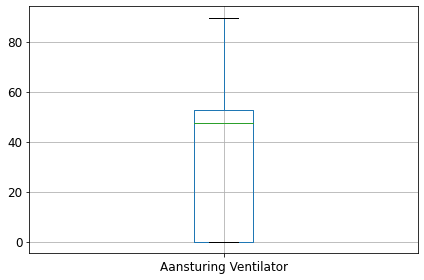

In [65]:
from pandas.plotting import boxplot
kenmerken = ['Aansturing Ventilator']
dataset_filter.boxplot(column=kenmerken)
save_fig("boxplot_aansturing")

Saving figure boxplot_fijnstof_drukverschil


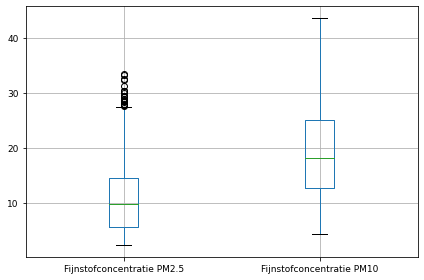

In [66]:
kenmerken = ['Fijnstofconcentratie PM2.5', 'Fijnstofconcentratie PM10']
dataset_filter.boxplot(column=kenmerken, fontsize=9)
save_fig("boxplot_fijnstof_drukverschil")

In [67]:
type(dataset_filter_labels)

pandas.core.series.Series

Saving figure boxplot_fijnstof_drukverschil


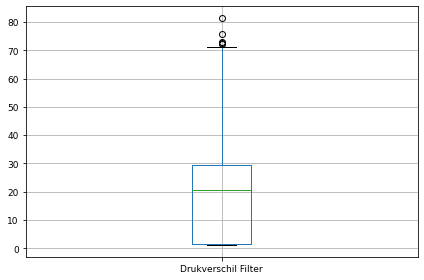

In [68]:
dataframe_filter_labels = dataset_filter_labels.to_frame()
kenmerken = ['Drukverschil Filter']
dataframe_filter_labels.boxplot(column=kenmerken, fontsize=9)
save_fig("boxplot_fijnstof_drukverschil")

Saving figure boxplot_flow


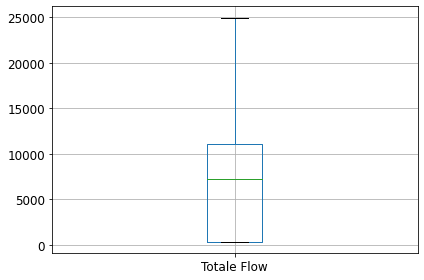

In [69]:
kenmerken = ['Totale Flow']
dataset_filter.boxplot(column=kenmerken)
save_fig("boxplot_flow")

De boxplots tonen aan dat er niet tot nauwelijks uitschieters gedecteerd zijn bij de kenmerken met een hoge relevantie. Alleen bij 'Fijnstofconcentratie PM2.5'. Echter is de correlatie tot 'Drukverschil filter' maar rond de 0.7; erg laag dus.

Ook bij het kenmerk 'Drukverschil Filter' zijn er een aantal. Echter is schaling niet van toepassing bij het label van de dataset. Voor dit project zal gekozen worden voor normalisering (`MinMaxScaler`).

**Pipeline**

Het is mogelijk om bovenstaande transformaties samen te voegen in één functie; dit wordt ook wel een pipeline genoemd. Deze werkt alleen op numerieke waardes.

Het toevoegen van kolommen, door middel van berekeningen, kan ook in deze pipeline worden toegevoegd. Voor dit project is dit echter al aan het begin van het project gedaan. Voorbeeld hiervan is het opsommen van de individuele flowsensoren tot 'Totale flow'.

De pipeline zal bestaan uit de `imputer` (toevoegen van missende waardes door `SimpleImputer`) en `norm_scaler` (verschalen van waardes door `MinMaxScaler`)

In [70]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="mean")),
        ('norm_scaler', MinMaxScaler()),
    ])

dataset_filter_num_tr = num_pipeline.fit_transform(dataset_filter_num)

In [71]:
dataset_filter_num_tr

array([[0.00000000e+00, 6.80383055e-01, 5.85384840e-01, 0.00000000e+00,
        2.76123301e-04, 3.34293948e-01],
       [5.52640393e-01, 3.29545314e-01, 2.42524261e-01, 0.00000000e+00,
        4.16054291e-01, 1.41210375e-01],
       [0.00000000e+00, 2.37441589e-01, 1.23511964e-01, 0.00000000e+00,
        3.40503982e-03, 7.99711816e-01],
       ...,
       [5.81667969e-01, 2.20839324e-02, 6.01759382e-03, 0.00000000e+00,
        4.31620393e-01, 7.47838617e-01],
       [0.00000000e+00, 3.61140382e-01, 2.40122162e-01, 0.00000000e+00,
        1.34333700e-04, 2.53602305e-01],
       [0.00000000e+00, 4.98880452e-01, 3.48371878e-01, 0.00000000e+00,
        9.22485643e-05, 6.71469741e-01]])

Op dit moment worden numerieke en alfabetische waardes beide individeel voorbereid. SciKit-Learn heeft een waarbij de pipeline alles tegelijk kan uitvoeren; alfabetisch én numeriek.

In [72]:
from sklearn.compose import ColumnTransformer

num_kenmerken = list(dataset_filter_num)
cat_kenmerken = ["Klasse"]

voll_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_kenmerken),
        ("cat", OneHotEncoder(), cat_kenmerken),
    ])

dataset_filter_voorbereid = voll_pipeline.fit_transform(dataset_filter)

In [73]:
dataset_filter_voorbereid

array([[0.00000000e+00, 6.80383055e-01, 5.85384840e-01, ...,
        2.76123301e-04, 3.34293948e-01, 1.00000000e+00],
       [5.52640393e-01, 3.29545314e-01, 2.42524261e-01, ...,
        4.16054291e-01, 1.41210375e-01, 1.00000000e+00],
       [0.00000000e+00, 2.37441589e-01, 1.23511964e-01, ...,
        3.40503982e-03, 7.99711816e-01, 1.00000000e+00],
       ...,
       [5.81667969e-01, 2.20839324e-02, 6.01759382e-03, ...,
        4.31620393e-01, 7.47838617e-01, 1.00000000e+00],
       [0.00000000e+00, 3.61140382e-01, 2.40122162e-01, ...,
        1.34333700e-04, 2.53602305e-01, 1.00000000e+00],
       [0.00000000e+00, 4.98880452e-01, 3.48371878e-01, ...,
        9.22485643e-05, 6.71469741e-01, 1.00000000e+00]])

In [74]:
dataset_filter_voorbereid.shape

(558, 7)

# 4 Modeleren

Als het voorbereiden van de data is voltooid is, kan het modeleren beginnen. Ten opzichte van voorgaande stappen, neemt deze taak aanzienlijk minder tijd is beslag.

Eerst worden een aantal modellen gekozen op basis van het probleem dat zich in het project voordoet. Deze modellen worden ieder getest, op basis van nauwkeurigheid, met een ‘testprogramma’. Het model dat als best uit deze test komt, zal verder ontwikkelt worden. In dit hoofdstuk word beschreven hoe de student bij dit project te werk is gegaan omtrent modeleren. 


**4.1 Selecteer Machine Learning modellen**

De eerste stap bij het modeleren bestaat uit het maken van een selectie met verschillende ML modellen. Hierbij is het belangrijk dat de eisen van de klant mee worden genomen bij het besluit. In dit project is dit echter minder belangrijk, omdat het om een Proof of Concept gaat. Er moet bewezen worden of de mogelijkheid er is.

In [75]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(dataset_filter_voorbereid, dataset_filter_labels)

LinearRegression()

Maak een selectie van een groep random data uit de dataset (`df`,`df_labels` en `df_voorbereid`).

In [76]:
df = dataset_filter.iloc[:5]
df_labels = dataset_filter_labels.iloc[:5]
df_voorbereid = voll_pipeline.transform(df)

print("voorspellingen:", lin_reg.predict(df_voorbereid))

voorspellingen: [ 3.55737352 29.05414242  3.29383272  2.77420049 59.93716324]


In [77]:
print("Labels:", list(df_labels))

Labels: [1.5, 28.404761904761905, 1.3333333333333333, 2.0, 57.53448275862069]


In [78]:
df_voorbereid

array([[0.00000000e+00, 6.80383055e-01, 5.85384840e-01, 0.00000000e+00,
        2.76123301e-04, 3.34293948e-01, 1.00000000e+00],
       [5.52640393e-01, 3.29545314e-01, 2.42524261e-01, 0.00000000e+00,
        4.16054291e-01, 1.41210375e-01, 1.00000000e+00],
       [0.00000000e+00, 2.37441589e-01, 1.23511964e-01, 0.00000000e+00,
        3.40503982e-03, 7.99711816e-01, 1.00000000e+00],
       [0.00000000e+00, 3.44332217e-01, 2.51134093e-01, 0.00000000e+00,
        1.85506384e-04, 1.87319885e-01, 1.00000000e+00],
       [8.52852518e-01, 2.26489486e-01, 1.14047001e-01, 0.00000000e+00,
        8.38999380e-01, 5.48991354e-01, 1.00000000e+00]])

Het eerste model dat geïmporteerd wordt, is het lineaire regressie model. 

In [79]:
from sklearn.metrics import mean_squared_error

dataset_filter_voorspellingen = lin_reg.predict(dataset_filter_voorbereid)
lin_mse = mean_squared_error(dataset_filter_labels, dataset_filter_voorspellingen)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

2.7119965620276894

In [80]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(dataset_filter_labels, dataset_filter_voorspellingen)
lin_mae

2.0754563570315456

In [81]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(dataset_filter_voorbereid, dataset_filter_labels)

DecisionTreeRegressor(random_state=42)

In [82]:
dataset_filter_voorspellingen = tree_reg.predict(dataset_filter_voorbereid)
tree_mse = mean_squared_error(dataset_filter_labels, dataset_filter_voorspellingen)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.9725086425717357e-17

In [83]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(dataset_filter_voorbereid, dataset_filter_labels)

dataset_filter_voorspellingen = forest_reg.predict(dataset_filter_voorbereid)
forest_mse = mean_squared_error(dataset_filter_labels, dataset_filter_voorspellingen)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.8580965401547406

In [84]:
from sklearn.svm import SVR

svm_reg = SVR(kernel="linear")
svm_reg.fit(dataset_filter_voorbereid, dataset_filter_labels)
dataset_filter_voorspellingen = svm_reg.predict(dataset_filter_voorbereid)
svm_mse = mean_squared_error(dataset_filter_labels, dataset_filter_voorspellingen)
svm_rmse = np.sqrt(svm_mse)
svm_rmse

5.820070626338437

**4.2 Testontwerp**

Het resultaat van het testontwerp bestaat uit een ontwerp dat de modellen test op nauwkeurigheid. Hieronder worden modellen getest aan de hand van de Cross-Validation methode.

In [85]:
# Functie om RMSE scores te weergeven
def weergave_rmse_scores(scores):
    print("RMSE scores:", scores)
    print("Gemiddelde RMSE score:", scores.mean())
    print("Standaard deviatie:", scores.std())

In [86]:
# Functie om RMSE scores te berekenen middels Cross-Validation
from sklearn.model_selection import cross_val_score

def cross_val_test(model):
    scores = cross_val_score(model, dataset_filter_voorbereid, dataset_filter_labels,
                         scoring="neg_mean_squared_error", cv=10)
    rmse_score = np.sqrt(-scores)
    return rmse_score

In [87]:
# Cross-Validation op lineair regressie model
lin_reg_scores = cross_val_test(lin_reg)
weergave_rmse_scores(lin_reg_scores)
pd.Series(lin_reg_scores).describe()

RMSE scores: [2.86843778 3.22610932 2.05921369 2.94822072 2.94915851 3.06051373
 3.04605012 2.45737317 2.22043943 2.42945418]
Gemiddelde RMSE score: 2.7264970651608693
Standaard deviatie: 0.38002683440846896


count    10.000000
mean      2.726497
std       0.400583
min       2.059214
25%       2.436434
50%       2.908329
75%       3.021827
max       3.226109
dtype: float64

In [88]:
# Cross-Validation op decision tree model
tree_rmse_scores = cross_val_test(tree_reg)
weergave_rmse_scores(tree_rmse_scores)
pd.Series(tree_rmse_scores).describe()

RMSE scores: [1.83623762 7.73989931 1.76881261 1.82135234 2.90177003 2.20378955
 1.53167858 1.58667144 1.98536776 2.25948348]
Gemiddelde RMSE score: 2.563506273042206
Standaard deviatie: 1.7662293798816233


count    10.000000
mean      2.563506
std       1.861769
min       1.531679
25%       1.781948
50%       1.910803
75%       2.245560
max       7.739899
dtype: float64

In [89]:
# Cross-Validation op random forest model
forest_scores = cross_val_test(forest_reg)
weergave_rmse_scores(forest_scores)
pd.Series(forest_scores).describe()

RMSE scores: [1.51810272 6.29135068 1.20079241 1.76455847 1.99836376 1.57706734
 1.97374024 1.62580099 1.64766369 1.19542175]
Gemiddelde RMSE score: 2.079286204036272
Standaard deviatie: 1.4272454014906257


count    10.000000
mean      2.079286
std       1.504449
min       1.195422
25%       1.532844
50%       1.636732
75%       1.921445
max       6.291351
dtype: float64

In [90]:
# Cross-Validation op SVM model
svm_scores = cross_val_test(svm_reg)
weergave_rmse_scores(svm_scores)
pd.Series(svm_scores).describe()

RMSE scores: [6.90182692 6.91877396 6.26013777 6.10280402 5.16586848 6.65596632
 5.56532505 4.97552393 5.40254664 5.76507722]
Gemiddelde RMSE score: 5.9713850311790875
Standaard deviatie: 0.6711325890053242


count    10.000000
mean      5.971385
std       0.707436
min       4.975524
25%       5.443241
50%       5.933941
75%       6.557009
max       6.918774
dtype: float64

**Finetuning van modellen**

Na het kiezen van een aantal modellen, moeten deze gefinetuned worden. Er zijn verschillende methodes om dit mogelijk te maken:
- Grid Search: Zoeken van de beste combinatie van hyperparameters met specifieke waardes.
- Randomized Search: 
- Ensamble: Net als bij Random Forest (opeenstapeling van decision trees) is het mogelijk om verschillende modellen naast elkaar te gebruiken.


**Grid Search**

Het is natuurlijk mogelijk om de hyperparameters handmatig te stellen. Dit zal echter veel te lang duren. 

Grid Search zoekt uit welke combinatie van waardes voor hyperparameters het beste zijn. De ontwerper hoeft alleen maar aan te geven met welke hyperparameters geëxperimenteerd word en welke waardes daar aan gehangen mogen worden. Vervolgens wordt Cross-Validation gebruikt om de beste combinatie te vinden.

In [91]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    # try 12 (4×3) combinations of hyperparameters
    {'n_estimators': [3, 10, 20, 50], 'max_features': [2, 4, 6]},
    # then try 6 (2×3) combinations with bootstrap set as False
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

forest_reg = RandomForestRegressor(random_state=42)
# train across 5 folds, that's a total of (12+6)*5=90 rounds of training 
grid_search = GridSearchCV(forest_reg, param_grid, cv=10,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(dataset_filter_voorbereid, dataset_filter_labels)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6],
                          'n_estimators': [3, 10, 20, 50]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [92]:
# De beste combinatie voor waardes tussen hyperparameters
grid_search.best_params_

{'max_features': 4, 'n_estimators': 50}

In [93]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=50, random_state=42)

Let's look at the score of each hyperparameter combination tested during the grid search:

In [94]:
cv_res = grid_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

5.141920862932979 {'max_features': 2, 'n_estimators': 3}
3.32234229483422 {'max_features': 2, 'n_estimators': 10}
3.0838626841261667 {'max_features': 2, 'n_estimators': 20}
3.056790159294012 {'max_features': 2, 'n_estimators': 50}
3.1257969139785504 {'max_features': 4, 'n_estimators': 3}
2.3389102153820156 {'max_features': 4, 'n_estimators': 10}
2.3171749732640903 {'max_features': 4, 'n_estimators': 20}
2.0499103803021956 {'max_features': 4, 'n_estimators': 50}
2.813847305977745 {'max_features': 6, 'n_estimators': 3}
2.403192433439042 {'max_features': 6, 'n_estimators': 10}
2.3076519519354997 {'max_features': 6, 'n_estimators': 20}
2.26552115511061 {'max_features': 6, 'n_estimators': 50}
4.294982990428239 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
4.024253591181775 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
2.733076182950944 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
2.3193851052484025 {'bootstrap': False, 'max_features': 3, 'n_estimator

**Randomized Search**

Randomized Search is een methode die het mogelijk maakt om meer waardes en meer combinaties te testen dan bij de Grid Search. Hierbij wordt een willekeurige waarde gekozen voor een willekeurige combinatie. De ontwerper moet het aantal combinaties kiezen en het bereik voor de waardes die ingevuld worden voor de hyperparameters. Daarnaast kan de ontwerper waardes invullen voor Cross-Validation.

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Bereik voor waardes van hyperparameters
param_distribs = {
        'n_estimators': randint(low=10, high=200),
        'max_features': randint(low=3, high=7),
    }

# 'n_iter=x' geeft aantal combinaties aan
# 'cv=x' geeft aantal 'folds' (= hoeveelheid subsets gecreërd uit trainset) aan
forest_reg = RandomForestRegressor(random_state=42)
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                n_iter=20, cv=10, scoring='neg_mean_squared_error', random_state=42)
rnd_search.fit(dataset_filter_voorbereid, dataset_filter_labels)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
                   n_iter=20,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D113A2D670>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001D113ADD460>},
                   random_state=42, scoring='neg_mean_squared_error')

In [96]:
cv_res = rnd_search.cv_results_
for mean_score, params in zip(cv_res["mean_test_score"], cv_res["params"]):
    print(np.sqrt(-mean_score), params)

2.0843143350227287 {'max_features': 5, 'n_estimators': 189}
2.4931814314222818 {'max_features': 3, 'n_estimators': 24}
2.0733220044206395 {'max_features': 5, 'n_estimators': 81}
2.3837701944557574 {'max_features': 3, 'n_estimators': 30}
2.0308746540788407 {'max_features': 5, 'n_estimators': 131}
2.083631965734928 {'max_features': 5, 'n_estimators': 84}
2.0825678785044746 {'max_features': 5, 'n_estimators': 97}
2.302016371632877 {'max_features': 3, 'n_estimators': 109}
2.3108401792045568 {'max_features': 6, 'n_estimators': 161}
2.078156852693699 {'max_features': 5, 'n_estimators': 159}
2.6415945319510437 {'max_features': 3, 'n_estimators': 11}
2.3089196434329744 {'max_features': 6, 'n_estimators': 167}
2.080305637530681 {'max_features': 4, 'n_estimators': 139}
2.3441581373215636 {'max_features': 6, 'n_estimators': 197}
2.2657264639027597 {'max_features': 3, 'n_estimators': 170}
2.2968036910758314 {'max_features': 6, 'n_estimators': 67}
2.0367147477039813 {'max_features': 4, 'n_estimator

In [97]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.36865389, 0.01759161, 0.00917023, 0.        , 0.59615725,
       0.00842702, 0.        ])

In [98]:
cat_encoder = voll_pipeline.named_transformers_["cat"]
cat_one_hot_kenmerken = list(cat_encoder.categories_[0])
kenmerken = num_kenmerken + cat_one_hot_kenmerken
sorted(zip(feature_importances, kenmerken), reverse=True)

[(0.5961572503438652, 'Totale Flow'),
 (0.3686538866528061, 'Aansturing Ventilator'),
 (0.01759161031070911, 'Fijnstofconcentratie PM10'),
 (0.009170233165228187, 'Fijnstofconcentratie PM2.5'),
 (0.008427019527391439, 'Voltooide Levensduur'),
 (0.0, 'Filteroppervlak'),
 (0.0, 'F7')]

In [104]:
def_model = rnd_search#.best_estimator_

X_test = strat_test_set.drop("Drukverschil Filter", axis=1)
y_test = strat_test_set["Drukverschil Filter"].copy()

X_test_voorbereid = voll_pipeline.transform(X_test)
def_voorspellingen = def_model.predict(X_test_voorbereid)

def_mse = mean_squared_error(y_test, def_voorspellingen)
def_rmse = np.sqrt(def_mse)
def_rmse

1.7891260325319271

Het is mogelijk om een betrouwbaarheidsinterval te berekenen. Hierdoor kan er iets gezegd worden over het interval waar de afwijking daadwerkelijk in zal vallen.

In [106]:
from scipy import stats

betrouwbaarheid = 0.95
squared_errors = (def_voorspellingen - y_test) ** 2
np.sqrt(stats.t.interval(betrouwbaarheid, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([1.34767583, 2.14142798])

Het kiezen van een Random Forrest model, met de daarbij horende hyperparameters, zal resulteren in een afwijking van 1.79 Pascal op het drukverschil. Er kan met 95% betrouwbaarheid gezegd worden dat de daadwerkelijke afwijking tussen 1.34 en 2.14 Pascal ligt.

# Model opslaan

In [108]:
# Creëeren van een pipeline met voorbereiding en model
voll_pipeline_model = Pipeline([
        ("voorbereiding", voll_pipeline),
        ("rand_forest", def_model)
    ])

voll_pipeline_model.fit(dataset_filter, dataset_filter_labels)
voll_pipeline_model.predict(df)

array([ 1.5694293 , 28.66949926,  1.53256997,  2.05407125, 57.98342265])

In [109]:
def_model_123 = voll_pipeline_model

In [110]:
import joblib

# Model opslaan als .pkl bestand
joblib.dump(def_model_123, "def_model_123.pkl")
# Model ophalen
def_model_loaded = joblib.load("def_model_123.pkl")

# Model testen